#PCKGES+DATA

In [ ]:
!pip install numpy==1.23.5
!pip install scipy==1.10.1
!pip install scikit-learn==1.2.2
!pip install pandas==1.5.3
!pip install tqdm==4.66.1
!pip install packaging==23.1
!pip install slicer==0.0.7
!pip install numba==0.56.4
!pip install cloudpickle==2.2.1
!pip install llvmlite==0.39.1
!pip install python-dateutil==2.8.2
!pip install pytz==2023.3
!pip install joblib==1.3.2
!pip install threadpoolctl==3.2.0
!pip install shap==0.42.1
!pip install umap-learn==0.5.3
!pip install pynndescent==0.5.10
!pip install hdbscan==0.8.33
!pip install cython==0.29.36
!pip install xgboost==1.7.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.2
    Uninstalling packaging-23.2:
      Successfully uninstalled packaging-23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is th

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import shap
import xgboost as xgb
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, train_test_split

Restart kernel after installing the packages

In [ ]:
url = 'https://raw.githubusercontent.com/resendislab/POST_COVID_Metabolome_MachineLearning/main/Data/Data.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df = df.set_index('Folio')

In [ ]:
matrix = df.iloc[:,2:]

In [ ]:
labels = df.iloc[:,:2]
labels

GROUP    GROUP2
Folio                               
CV19-0007A         CONTROL   CONTROL
CV19-0071A         CONTROL   CONTROL
CV19-0079A         CONTROL   CONTROL
CV19-0118A         CONTROL   CONTROL
CV19-0125A         CONTROL   CONTROL
...                    ...       ...
CV19-0830A  CRITICALLY ILL  COVID-19
CV19-0833A  CRITICALLY ILL  COVID-19
CV19-0834A  CRITICALLY ILL  COVID-19
CV19-0932A  CRITICALLY ILL  COVID-19
CV19-0936A  CRITICALLY ILL  COVID-19

[228 rows x 2 columns]

In [ ]:
labels['GROUP2'].unique()

array(['CONTROL', 'COVID-19', 'POST-COVID'], dtype=object)

##COVID VS post_COVID-19

In [ ]:
# Filter out control group from matrix and labels
m_covid_vs_post_covid = matrix[labels['GROUP2'] != "CONTROL"]
l_covid_vs_post_covid = labels[labels['GROUP2'] != "CONTROL"]

# Create a dictionary to map 'COVID-19' to 0 and 'POST-COVID' to 1
dictionary = {'COVID-19': 0, 'POST-COVID': 1}

# Replace 'COVID-19' with 0 and 'POST-COVID' with 1
l_covid_vs_post_covid['GROUP2'] = l_covid_vs_post_covid['GROUP2'].replace(dictionary)

# Assign filtered labels to y and filtered matrix to X
X = m_covid_vs_post_covid
y = l_covid_vs_post_covid['GROUP2'].values


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#randomizedsearchCV

In [ ]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""
# Step 3: Define the parameter distribution for random search
param_dist = {
    'max_depth': randint(3, 9),
    'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    'n_estimators': randint(100, 501),
    'subsample': uniform(0.4, 0.6),
    'colsample_bytree': uniform(0.4, 0.6),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
# Step 4: Create an XGBoost classifier
model = xgb.XGBClassifier()

# Step 5: Perform random search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1500, cv=5,random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Step 6: Print the best hyperparameters and evaluation scores
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Set Score: ", random_search.score(X_test, y_test))

In [ ]:
#best_params_=  {'colsample_bytree': 0.8625803079727365, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 114, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.663601901119462}

"""
Best Hyperparameters:  {'colsample_bytree': 0.440601017140001, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 197, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6749803849171938}
Best Score:  0.9804301075268818
Test Set Score:  0.9210526315789473
"""

"\nBest Hyperparameters:  {'colsample_bytree': 0.440601017140001, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 197, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6749803849171938}\nBest Score:  0.9804301075268818\nTest Set Score:  0.9210526315789473\n"

In [ ]:

best_params_=  {'colsample_bytree': 0.440601017140001, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 197, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.6749803849171938}


#Performance metrics

Accuracy: 0.9210526315789473
AUC: 0.9833333333333334


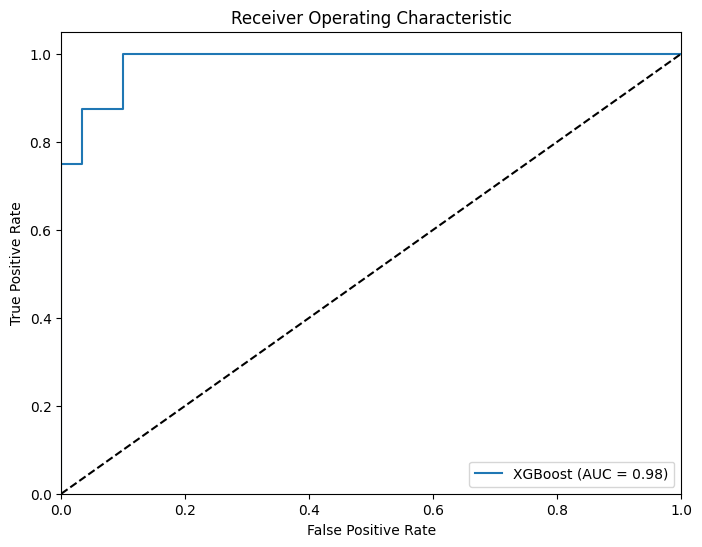

Cross-Validation Scores: [0.94736842 0.92105263 1.         0.97368421 1.        ]
Average CV Accuracy: 0.968421052631579


In [ ]:


# Step 1: Load the metabolome dataset
X = m_covid_vs_post_covid  # Feature matrix
y = l_covid_vs_post_covid.values  # Target labels

# Step 2: Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost classifier
model = xgb.XGBClassifier(**best_params_)  # Initialize XGBoost classifier with best parameters
model.fit(X_train, y_train)  # Train the classifier on the training data

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)  # Predict the labels for test data

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print(f"Accuracy: {accuracy}")

# Step 6: Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # Predict class probabilities for test data
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # Calculate ROC curve
auc = roc_auc_score(y_test, y_prob)  # Calculate AUC
print(f"AUC: {auc}")

# Step 7: Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Step 8: Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Perform cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))



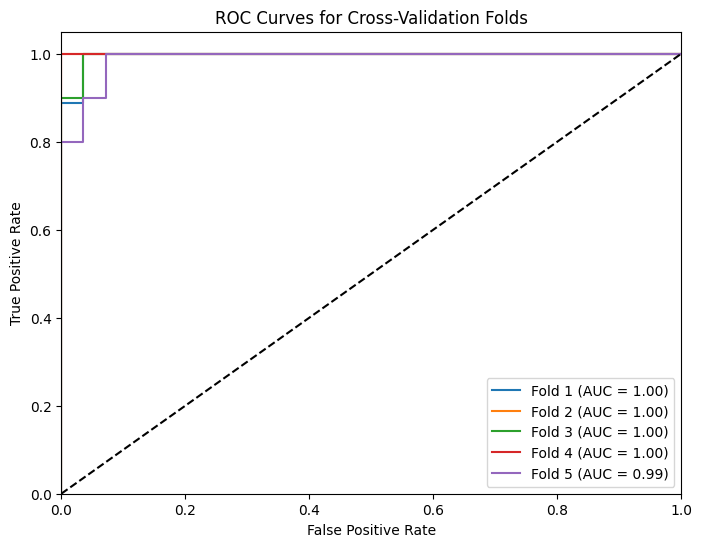

In [ ]:

#Train the XGBoost classifier and plot individual ROC curves for each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = xgb.XGBClassifier(**best_params_)
    model.fit(X_train, y_train)

    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross-Validation Folds')
plt.legend(loc='lower right')
plt.show()



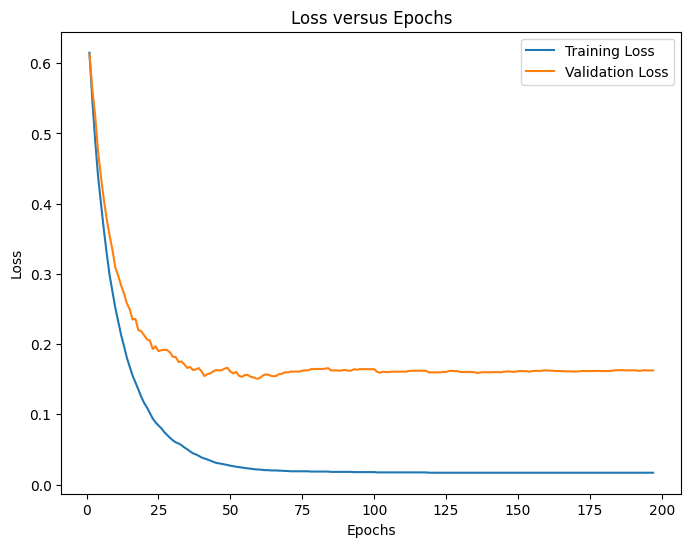

In [ ]:
# Split the data into training and testing sets with a test size of 10% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the XGBoost classifier with best parameters and monitor loss using logloss evaluation metric
model = xgb.XGBClassifier(**best_params_, eval_metric='logloss')

# Define evaluation set for monitoring training and validation loss
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the classifier on the training data with evaluation set, suppressing verbose output
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Extract training and validation loss from the training history
results = model.evals_result()
train_loss = results['validation_0']['logloss']
test_loss = results['validation_1']['logloss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss versus epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, test_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss versus Epochs')
plt.legend()
plt.show()



#SHAP

In [ ]:
# Split the data into training and test sets with a test size of 20% and a random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier with the best parameters and monitor logloss
model = xgb.XGBClassifier(**best_params_, eval_metric='logloss')

# Define evaluation set for early stopping
eval_set = [(X_test, y_test)]

# Train the classifier on the training data with early stopping
model.fit(X_train, y_train, early_stopping_rounds=40, eval_set=eval_set, verbose=False)

# Initialize a SHAP TreeExplainer with the trained XGBoost model
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the entire dataset
shap_values = explainer.shap_values(X)

# Predict labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


Accuracy: 0.9210526315789473


In [ ]:
#save shap matrix into a pickle file
with open('shap_values_covidvs_postcovid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)


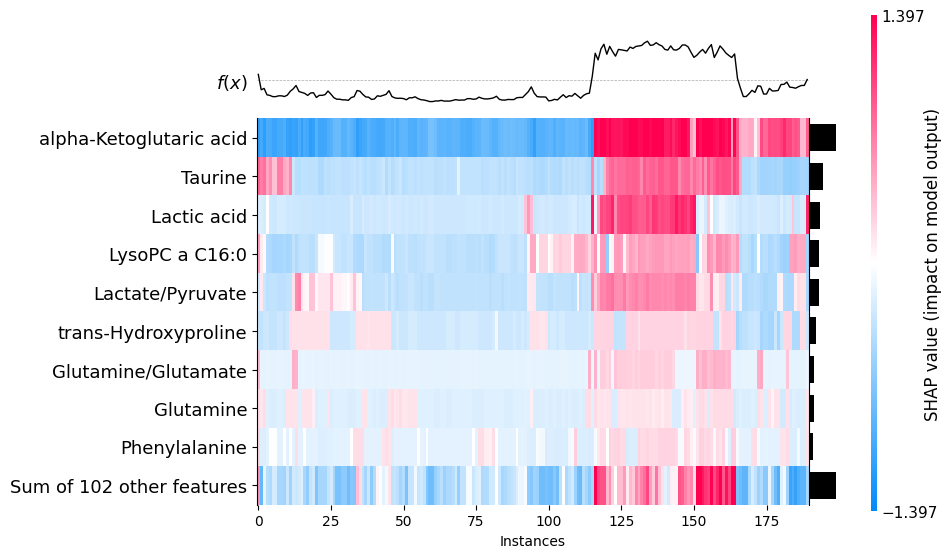

In [ ]:
shap_values_explaination = shap.Explanation(shap_values, feature_names=m_covid_vs_post_covid.columns.tolist())
shap.plots.heatmap(shap_values_explaination)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


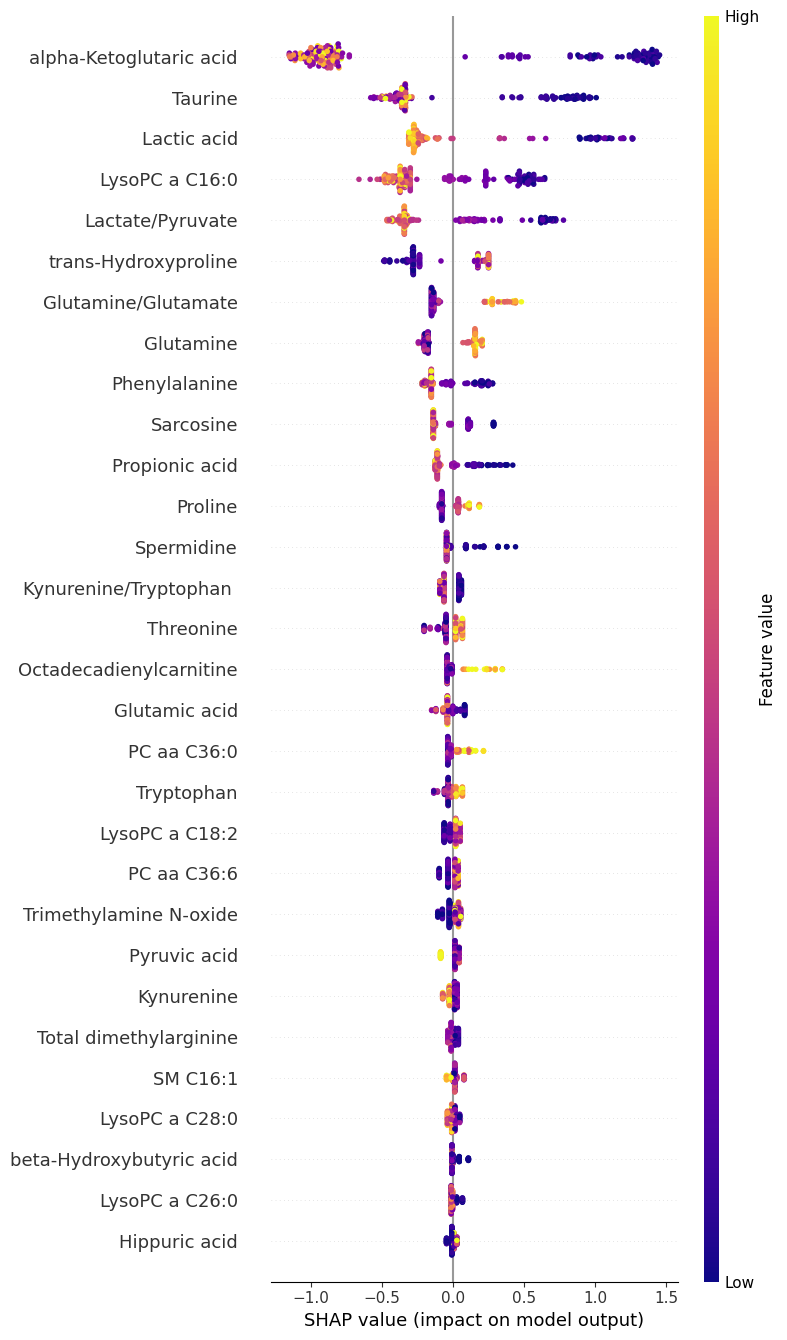

In [ ]:
#shap summary plot for biclass ml
shap.summary_plot(shap_values, X,cmap = "plasma",max_display=30)


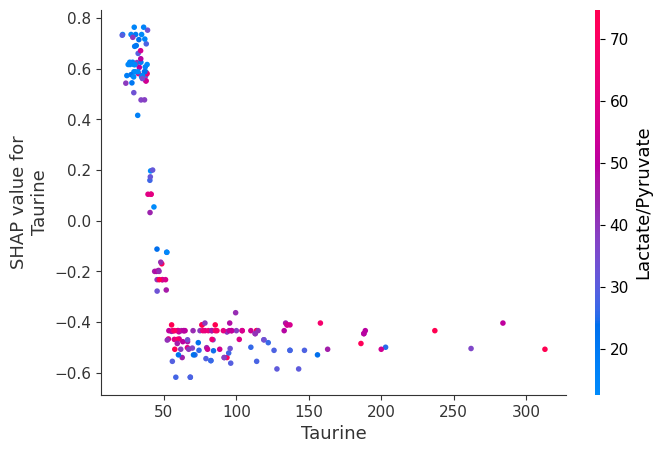

In [ ]:
shap.dependence_plot('Taurine', shap_values, X, interaction_index="Lactate/Pyruvate")

In [ ]:
labels['GROUP2']

Folio
CV19-0007A     CONTROL
CV19-0071A     CONTROL
CV19-0079A     CONTROL
CV19-0118A     CONTROL
CV19-0125A     CONTROL
                ...   
CV19-0830A    COVID-19
CV19-0833A    COVID-19
CV19-0834A    COVID-19
CV19-0932A    COVID-19
CV19-0936A    COVID-19
Name: GROUP2, Length: 228, dtype: object

first dependency plot (test)

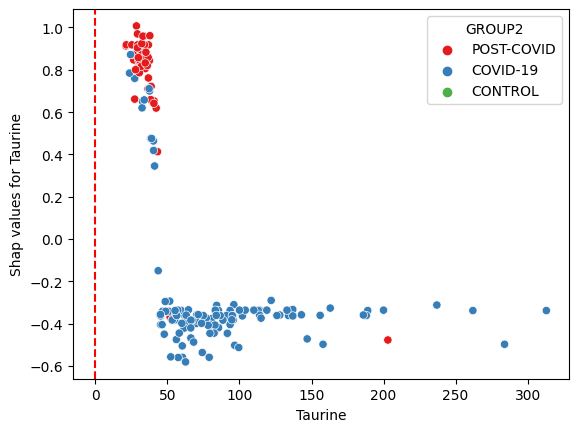

In [ ]:
string = 'Taurine'

# Select the feature values for the specified string
xx = X[string]

# Select the SHAP values corresponding to the specified feature
yy = pd.DataFrame(shap_values, columns=X.columns, index=X.index)[string]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=xx, y=yy, hue=labels['GROUP2'], palette='Set1')

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


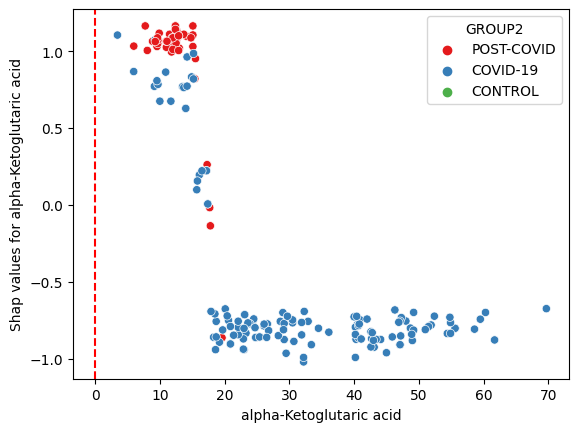

In [ ]:
# Define the feature string for analysis
string = 'alpha-Ketoglutaric acid'

# Select the feature values for the specified string
xx = X[string]

# Select the SHAP values corresponding to the specified feature
yy = pd.DataFrame(shap_values, columns=X.columns, index=X.index)[string]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=xx, y=yy, hue=labels['GROUP2'], palette='Set1')

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


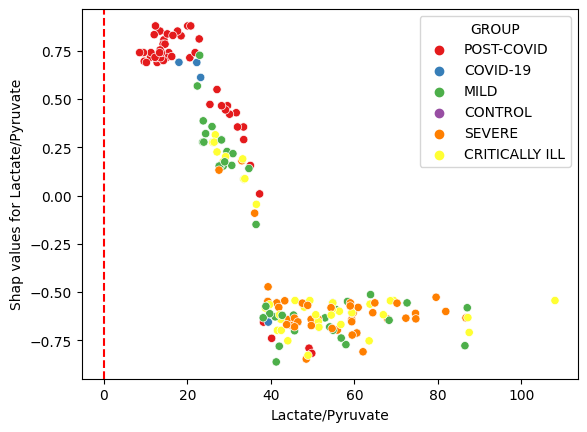

In [ ]:
# Define the feature string for analysis
string = 'Lactate/Pyruvate'

# Select the feature values for the specified string
xx = X[string]

# Select the SHAP values corresponding to the specified feature
yy = pd.DataFrame(shap_values, columns=X.columns, index=X.index)[string]

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
sns.scatterplot(x=xx, y=yy, hue=labels['GROUP'], palette='Set1')

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.05  # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))

##UMAP-SHAP

In [ ]:
from umap import UMAP

# Initialize UMAP model with specified parameters
model = UMAP(
    n_components=2,
    verbose=2,
    metric='euclidean',
    random_state=10,
    n_neighbors=15,
    n_epochs=500
)

# Fit UMAP model to SHAP values
umap_2d = model.fit_transform(shap_values)

# Create DataFrame for UMAP embedding with columns 'UMAP1' and 'UMAP2', and index from m_covid_vs_post_covid
CONTI_DF = pd.DataFrame(umap_2d, columns=['UMAP1', 'UMAP2'], index=m_covid_vs_post_covid.index)


UMAP(n_epochs=500, random_state=10, verbose=2)
Tue Nov 14 17:51:15 2023 Construct fuzzy simplicial set
Tue Nov 14 17:51:15 2023 Finding Nearest Neighbors
Tue Nov 14 17:51:15 2023 Finished Nearest Neighbor Search
Tue Nov 14 17:51:15 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Nov 14 17:51:16 2023 Finished embedding


In [ ]:
# Filter out samples labeled as "CONTROL" from the matrix
m_covid_vs_post_covid = matrix[labels['GROUP2'] != "CONTROL"]

# Filter out samples labeled as "CONTROL" from the labels
l_covid_vs_post_covid = labels[labels['GROUP2'] != "CONTROL"]


In [ ]:
CONTI_DF

UMAP1      UMAP2
Folio                           
834.1       -1.352201   1.256199
788.1       -2.370546   1.063209
783.1       21.386259  18.580942
811.1       21.648083  18.137369
643.1       -1.048115  11.068035
...               ...        ...
CV19-0830A  -1.487611   1.014556
CV19-0833A  -2.206692   2.026192
CV19-0834A  -1.551142   1.174587
CV19-0932A  21.509764  18.205053
CV19-0936A  21.222752  17.988331

[190 rows x 2 columns]

In [ ]:
CONTI_DF.to_csv('umap_contidf_covidvspostcovid.csv')

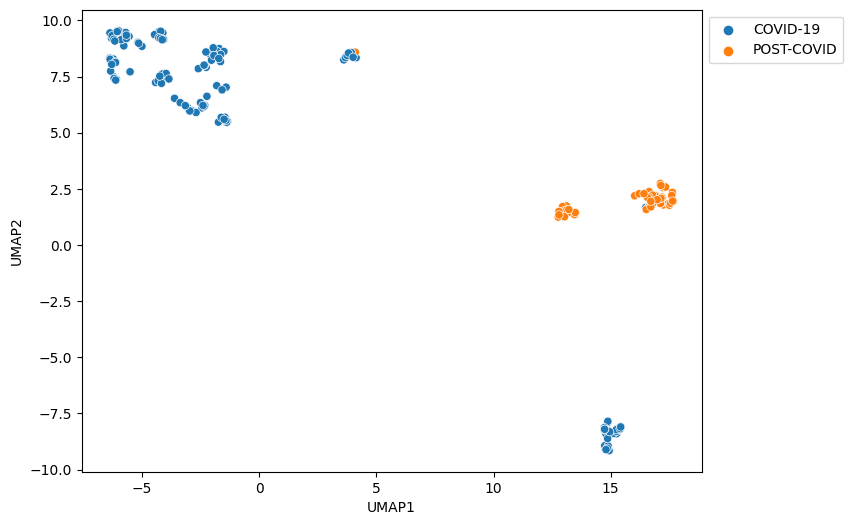

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=l_covid_vs_post_covid['GROUP2'], legend='full')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
shaps  = pd.DataFrame(shap_values, columns= m_covid_vs_post_covid.columns,index=m_covid_vs_post_covid.index)

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


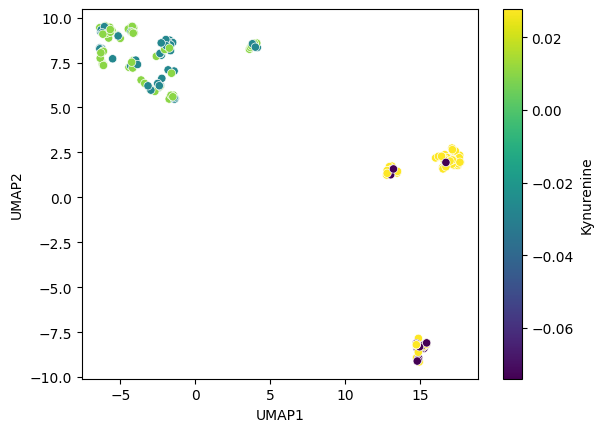

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=shaps['Kynurenine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Get the color values for the scatter plot
color_values = shaps['Kynurenine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Kynurenine')

# Show the plot
plt.show()


Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


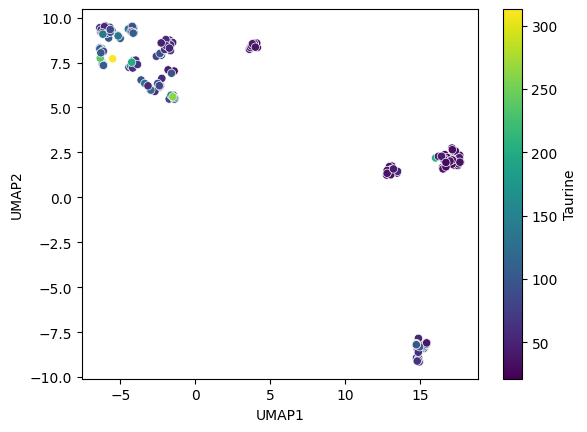

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scatter_plot = sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], c=m_covid_vs_post_covid['Taurine'], cmap='viridis')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Get the color values for the scatter plot
color_values = m_covid_vs_post_covid['Taurine']

# Create a colorbar using the color values
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array(color_values)

# Add a colorbar to the right of the plot
cbar = plt.colorbar(sm)
cbar.set_label('Taurine')

# Show the plot
plt.show()



In [ ]:
m_covid_vs_post_covid= matrix[labels['GROUP2'] != "CONTROL"]
l_covid_vs_post_covid =labels[labels['GROUP2'] != "CONTROL"]

In [ ]:
CONTI_DF

UMAP1      UMAP2
Folio                           
834.1       -1.352201   1.256199
788.1       -2.370546   1.063209
783.1       21.386259  18.580942
811.1       21.648083  18.137369
643.1       -1.048115  11.068035
...               ...        ...
CV19-0830A  -1.487611   1.014556
CV19-0833A  -2.206692   2.026192
CV19-0834A  -1.551142   1.174587
CV19-0932A  21.509764  18.205053
CV19-0936A  21.222752  17.988331

[190 rows x 2 columns]

In [ ]:
from umap import UMAP
import hdbscan

# Initialize UMAP model with specified parameters
model = UMAP(
    n_components=30,
    verbose=2,
    metric='euclidean',
    random_state=42,
    n_neighbors=15,
    n_epochs=500,
    min_dist=0.01
)

# Fit UMAP model to SHAP values
umap_2d = model.fit_transform(shap_values)

# Create DataFrame for UMAP embedding with index from m_covid_vs_post_covid
CONTI_DF_1 = pd.DataFrame(umap_2d, index=m_covid_vs_post_covid.index)

# Initialize HDBSCAN clusterer with specified parameters
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=10,
    cluster_selection_method='leaf',
    min_samples=4
)

# Fit HDBSCAN clusterer to the UMAP embeddings
clusterer.fit(CONTI_DF_1)

# Retrieve cluster labels
labels = clusterer.labels_


UMAP(min_dist=0.01, n_components=30, n_epochs=500, random_state=42, verbose=2)
Tue Nov 14 17:51:37 2023 Construct fuzzy simplicial set
Tue Nov 14 17:51:37 2023 Finding Nearest Neighbors
Tue Nov 14 17:51:37 2023 Finished Nearest Neighbor Search
Tue Nov 14 17:51:37 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Tue Nov 14 17:51:38 2023 Finished embedding


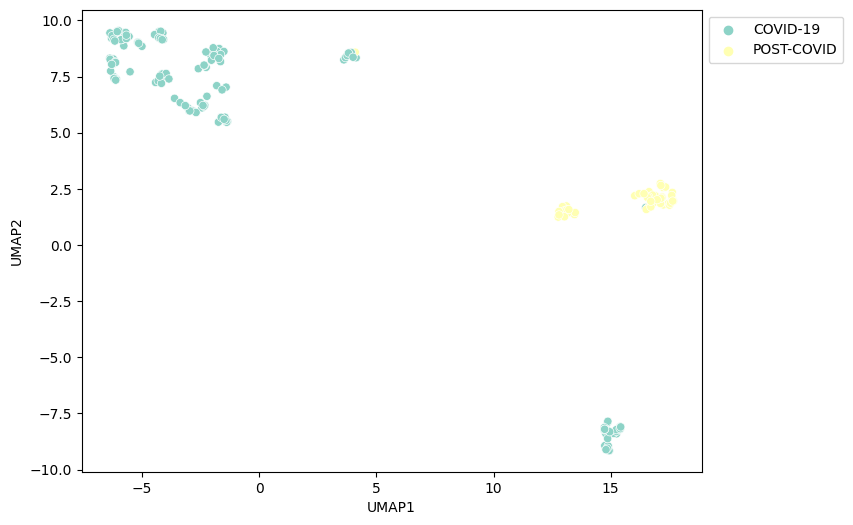

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=l_covid_vs_post_covid['GROUP2'], legend='full',palette='Set3')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Show the plot
plt.show()

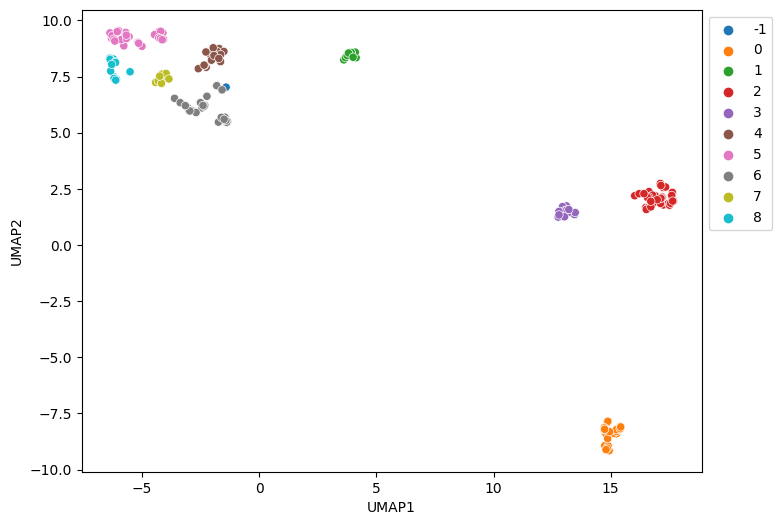

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=CONTI_DF['UMAP1'], y=CONTI_DF['UMAP2'], hue=labels, legend='full', palette='tab10')

# Add labels and title
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Adjust the figure size to accommodate the legend
plt.gcf().set_size_inches(8, 6)

# Move the legend to the right outside the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Save the plot with higher resolution
plt.savefig('scatter_plotcvspc.png', dpi=600, bbox_inches='tight')  # Adjust the file name and format as desired

# Show the plot
plt.show()

In [ ]:
CONTI_DF['hdbscan']  = labels

In [ ]:
CONTI_DF

UMAP1     UMAP2  hdbscan
Folio                                   
834.1       -2.318198  6.218015        6
788.1       -1.620788  5.689461        6
783.1       15.249035 -8.404150        0
811.1       15.124228 -8.383878        0
643.1       -6.193898  7.488090        8
...               ...       ...      ...
CV19-0830A  -2.351053  6.173323        6
CV19-0833A   4.008070  8.359900        1
CV19-0834A  -2.396015  6.212953        6
CV19-0932A  14.741774 -8.202095        0
CV19-0936A  15.428061 -8.098392        0

[190 rows x 3 columns]

In [ ]:
CONTI_DF.to_csv('umap_hdbscan_cvspc.csv')

In [ ]:
m_covid_vs_post_covid_HDBSCAN = m_covid_vs_post_covid[labels != -1]
m_covid_vs_post_covid_HDBSCAN['hdbscan'] =labels[labels != -1]
m_covid_vs_post_covid_HDBSCAN


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
834.1              26.425532              9.014675             3.755411   
788.1              27.631579              7.284768             1.954248   
783.1              46.470588              9.117647             2.014815   
811.1              51.518834             12.204724             1.057229   
643.1              86.755952              5.717949             1.554622   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
834.1                     0.099780       114.0    181.0      574    90.8   
788.1                     0.046838        45.8    186.0      299   118.0   
783.1                     0.095443        64.3    197.0      344    72.1   
811.1                     0.069402       100.0    220.0      603    82.8   
643.1                     0.097222        43.0    128.0      206    53.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Octanoylcarnitine  Decadienylcarnitine  \
Folio                        ...                                           
834.1         206.0   247.0  ...             0.2395               0.1776   
788.1          90.8   200.0  ...             0.0825               0.0928   
783.1         123.0   207.0  ...             0.0864               0.1371   
811.1         120.0   264.0  ...             0.1481               0.1973   
643.1          70.2   189.0  ...             0.1113               0.1318   
...             ...     ...  ...                ...                  ...   
CV19-0830A    125.0   245.0  ...             0.1348               0.1569   
CV19-0833A    111.0   275.0  ...             0.2481               0.1557   
CV19-0834A    206.0   247.0  ...             0.2395               0.1776   
CV19-0932A    219.0   552.0  ...             0.3273               0.1791   
CV19-0936A     89.5   273.0  ...             0.1934               0.1900   

            Decenoylcarnitine  Decanoylcarnitine  Dodecenoylcarnitine  \
Folio                                                                   
834.1                  0.3464             0.3441               0.2043   
788.1                  0.1806             0.1759               0.1012   
783.1                  0.1739             0.1675               0.0796   
811.1                  0.2874             0.3360               0.1235   
643.1                  0.1899             0.1858               0.1044   
...                       ...                ...                  ...   
CV19-0830A             0.2186             0.4441               0.1232   
CV19-0833A             0.3837             0.6554               0.1521   
CV19-0834A             0.3464             0.3441               0.2043   
CV19-0932A             0.4793             0.5729               0.2027   
CV19-0936A             0.2726             0.3561               0.0964   

            Dodecanoylcarnitine  Hexadecanoylcarnitine  \
Folio                                             

In [ ]:
m_covid_vs_post_covid_HDBSCAN.iloc[:,:-1]

Lactate/Pyruvate  Ornithine/Citrulline  Glutamine/Glutamate  \
Folio                                                                     
834.1              26.425532              9.014675             3.755411   
788.1              27.631579              7.284768             1.954248   
783.1              46.470588              9.117647             2.014815   
811.1              51.518834             12.204724             1.057229   
643.1              86.755952              5.717949             1.554622   
...                      ...                   ...                  ...   
CV19-0830A         26.108597              6.527027             0.663755   
CV19-0833A         33.262411              4.000000             3.410072   
CV19-0834A         26.425532              9.014675             3.755411   
CV19-0932A         42.077922              5.696970             9.709229   
CV19-0936A         27.107843              4.433498             3.628571   

            Kynurenine/Tryptophan   Creatinine  Glycine  Alanine  Serine  \
Folio                                                                      
834.1                     0.099780       114.0    181.0      574    90.8   
788.1                     0.046838        45.8    186.0      299   118.0   
783.1                     0.095443        64.3    197.0      344    72.1   
811.1                     0.069402       100.0    220.0      603    82.8   
643.1                     0.097222        43.0    128.0      206    53.5   
...                            ...         ...      ...      ...     ...   
CV19-0830A                0.216535        89.9    117.0      273    58.3   
CV19-0833A                0.190736       112.0    162.0      497    88.7   
CV19-0834A                0.099780       114.0    181.0      574    90.8   
CV19-0932A                0.111290        68.3    321.0      551   163.0   
CV19-0936A                0.134010       101.0    216.0      543   101.0   

            Proline  Valine  ...  Hydroxybutyrylcarnitine  Octanoylcarnitine  \
Folio                        ...                                               
834.1         206.0   247.0  ...                   0.1481             0.2395   
788.1          90.8   200.0  ...                   0.0375             0.0825   
783.1         123.0   207.0  ...                   0.0387             0.0864   
811.1         120.0   264.0  ...                   0.0536             0.1481   
643.1          70.2   189.0  ...                   0.1475             0.1113   
...             ...     ...  ...                      ...                ...   
CV19-0830A    125.0   245.0  ...                   0.1570             0.1348   
CV19-0833A    111.0   275.0  ...                   0.0738             0.2481   
CV19-0834A    206.0   247.0  ...                   0.1481             0.2395   
CV19-0932A    219.0   552.0  ...                   1.0753             0.3273   
CV19-0936A     89.5   273.0  ...                   0.0655             0.1934   

            Decadienylcarnitine  Decenoylcarnitine  Decanoylcarnitine  \
Folio                                                                   
834.1                    0.1776             0.3464             0.3441   
788.1                    0.0928             0.1806             0.1759   
783.1                    0.1371             0.1739             0.1675   
811.1                    0.1973             0.2874             0.3360   
643.1                    0.1318             0.1899             0.1858   
...                         ...                ...                ...   
CV19-0830A               0.1569             0.2186             0.4441   
CV19-0833A               0.1557             0.3837             0.6554   
CV19-0834A               0.1776             0.3464             0.3441   
CV19-0932A               0.1791             0.4793             0.5729   
CV19-0936A               0.1900             0.2726             0.3561   

            Dodecenoylcarnitine  Dodecanoylcarnitine  He

In [ ]:
m_covid_vs_post_covid_HDBSCAN['hdbscan']

Folio
834.1         6
788.1         6
783.1         0
811.1         0
643.1         8
             ..
CV19-0830A    6
CV19-0833A    1
CV19-0834A    6
CV19-0932A    0
CV19-0936A    0
Name: hdbscan, Length: 189, dtype: int64

#Embeddings

hyperparameters

In [ ]:

X=m_covid_vs_post_covid_HDBSCAN.iloc[:,:-1]
y= m_covid_vs_post_covid_HDBSCAN['hdbscan'].values

# Split the data into training and test sets

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Define the parameter distribution for random search
#param_dist = {
    #'max_depth': randint(3, 7),
    #'learning_rate': [0.1, 0.01, 0.001, 0.0001],
    #'n_estimators': randint(100, 501),
    #'subsample': uniform(0.4, 0.6),
    #'colsample_bytree': uniform(0.4, 0.6),
    #'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
    #'reg_alpha': [0, 0.1, 0.5, 1],
    #'reg_lambda': [0, 0.1, 0.5, 1]
#}

#Create an XGBoost classifier
#model = xgb.XGBClassifier()

# Perform random search
#random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=1500, cv=5,random_state=42, verbose = 1)
#random_search.fit(X_train, y_train)

#Print the best hyperparameters and evaluation scores
#print("Best Hyperparameters: ", random_search.best_params_)
#print("Best Score: ", random_search.best_score_)
#print("Test Set Score: ", random_search.score(X_test, y_test))

In [ ]:
best_params_= {'colsample_bytree': 0.8767977354387334, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 147, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.9125548369323637}

In [ ]:

X = m_covid_vs_post_covid_HDBSCAN.iloc[:,:-1]
y = m_covid_vs_post_covid_HDBSCAN['hdbscan'].values
#Train the XGBoost classifier and plot individual ROC curves for each fold

#Create an XGBoost classifier with early stopping
model = xgb.XGBClassifier(**best_params_)
model.fit(X, y)

#Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)


In [ ]:

# Assuming you have a NumPy array named "arr"
with open('hdbscan_covidvs_postcovid.pkl', 'wb') as file:
    pickle.dump(shap_values, file)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0],X, feature_names=X.columns,plot_cmap = "PkYg",figsize=(90, 90))


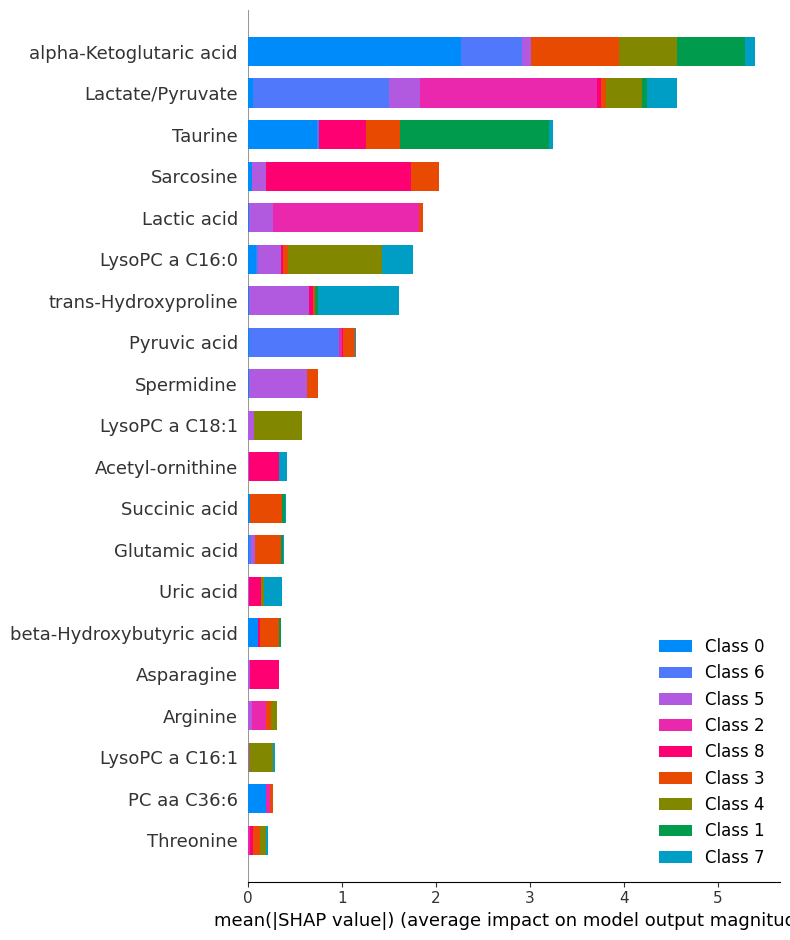

In [ ]:
shap.summary_plot(shap_values, X)

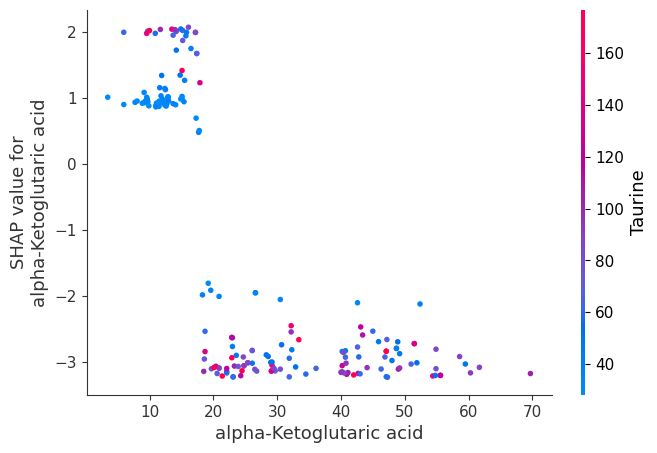

In [ ]:
shap.dependence_plot('alpha-Ketoglutaric acid', shap_values[0], X, interaction_index="Taurine")

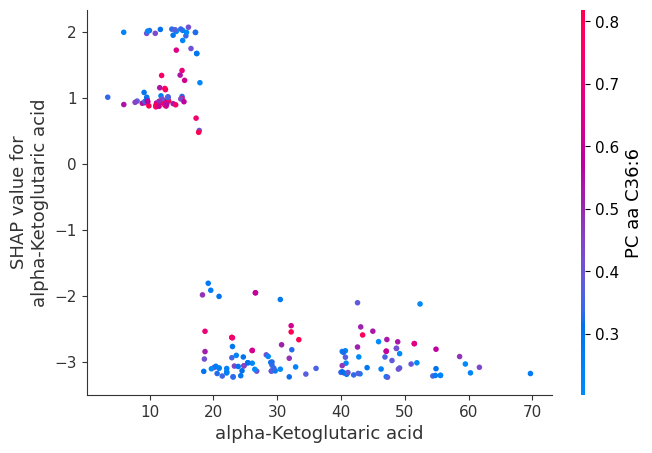

In [ ]:
shap.dependence_plot('alpha-Ketoglutaric acid', shap_values[0], X, interaction_index="PC aa C36:6")

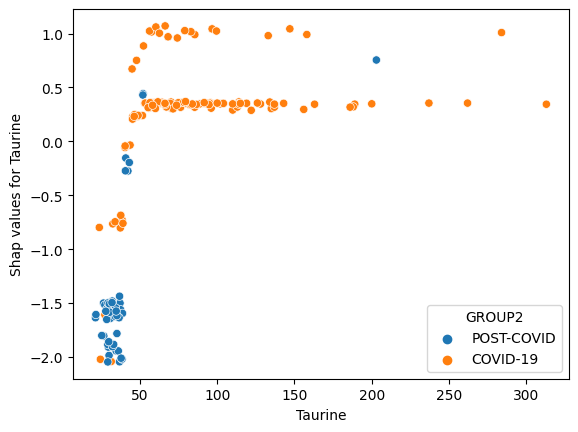

In [ ]:
xx= X['Taurine']
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)['Taurine']

import seaborn as sns
# Create a scatter plot
sns.scatterplot(x=xx, y=yy,hue=l_covid_vs_post_covid['GROUP2'])

# Add labels and title
plt.xlabel('Taurine')
plt.ylabel('Shap values for Taurine')

# Show the plot
plt.show()

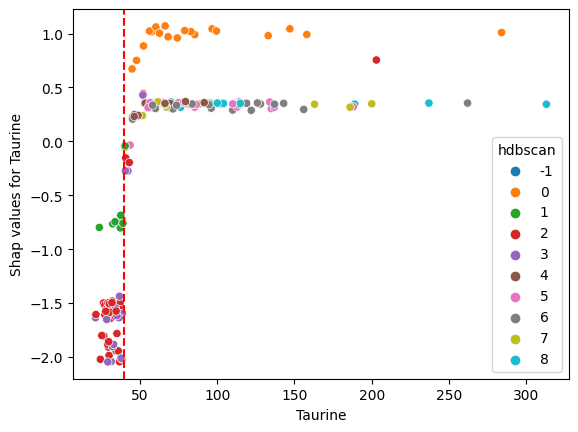

In [ ]:
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 40 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()


#RULES FOR CHARACTERIZATION

#Cluster 0

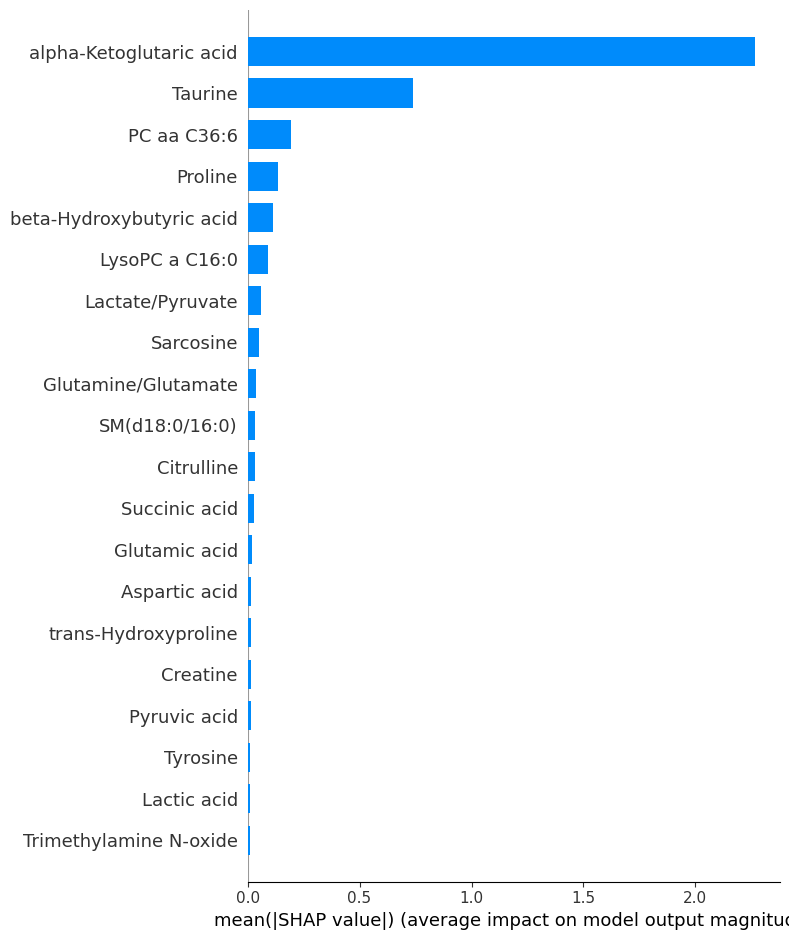

'\nalpha-Ketoglutaric acid\nTaurine\nPC aa C36:6\n'

In [ ]:
shap.summary_plot(shap_values[0], X,plot_type='bar')
"""
alpha-Ketoglutaric acid
Taurine
PC aa C36:6
"""

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


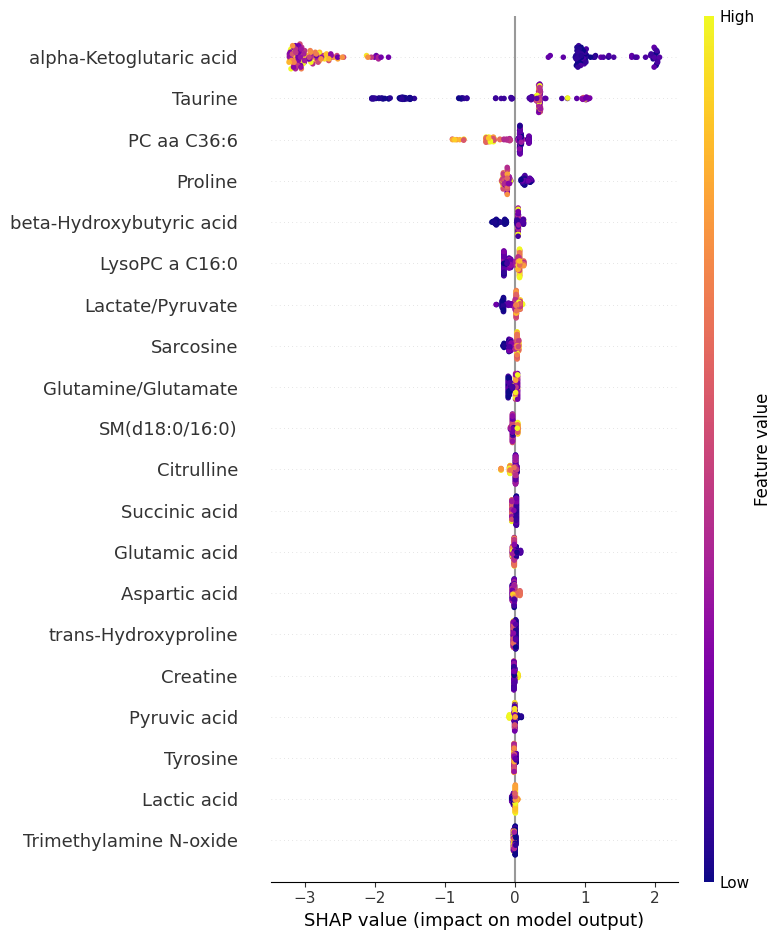

'\nalpha-Ketoglutaric acid\nTaurine\nPC aa C36:6\n'

In [ ]:
shap.summary_plot(shap_values[0], X,cmap = "plasma")
"""
alpha-Ketoglutaric acid
Taurine
PC aa C36:6
"""

In [ ]:
CONTI_DF[CONTI_DF['hdbscan'] !=-1]['hdbscan']

Folio
834.1         6
788.1         6
783.1         0
811.1         0
643.1         8
             ..
CV19-0830A    6
CV19-0833A    1
CV19-0834A    6
CV19-0932A    0
CV19-0936A    0
Name: hdbscan, Length: 189, dtype: int64

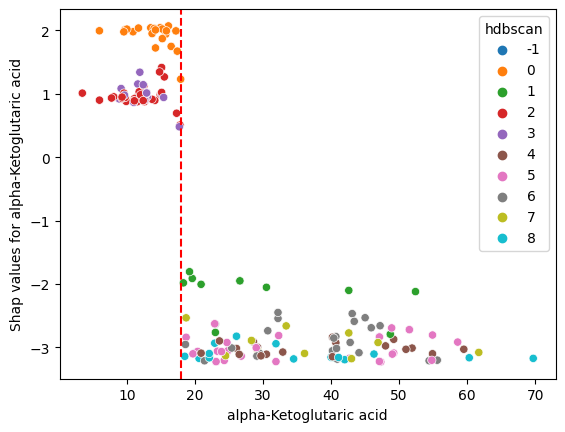

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
PC aa C36:6
"""

string = 'alpha-Ketoglutaric acid'
xx= X[string]
yy = pd.DataFrame(shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 18 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

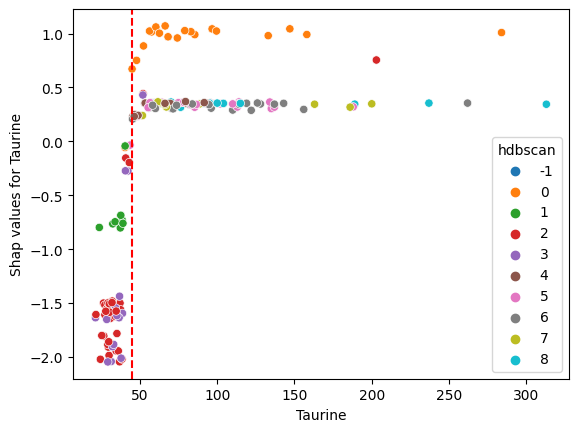

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
PC aa C36:6
"""

string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 45 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

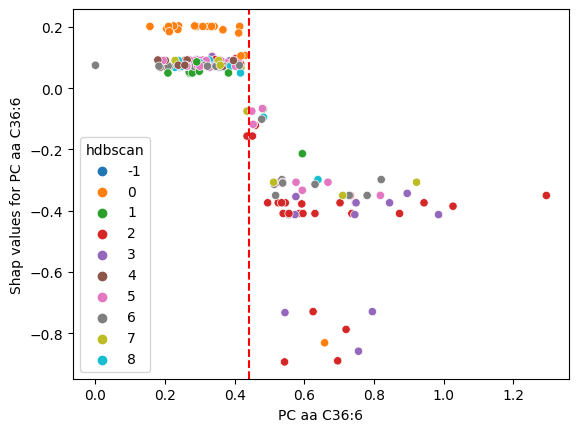

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
PC aa C36:6
"""

string = 'PC aa C36:6'
xx= X[string]
yy = pd.DataFrame( shap_values[0],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.44 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 1

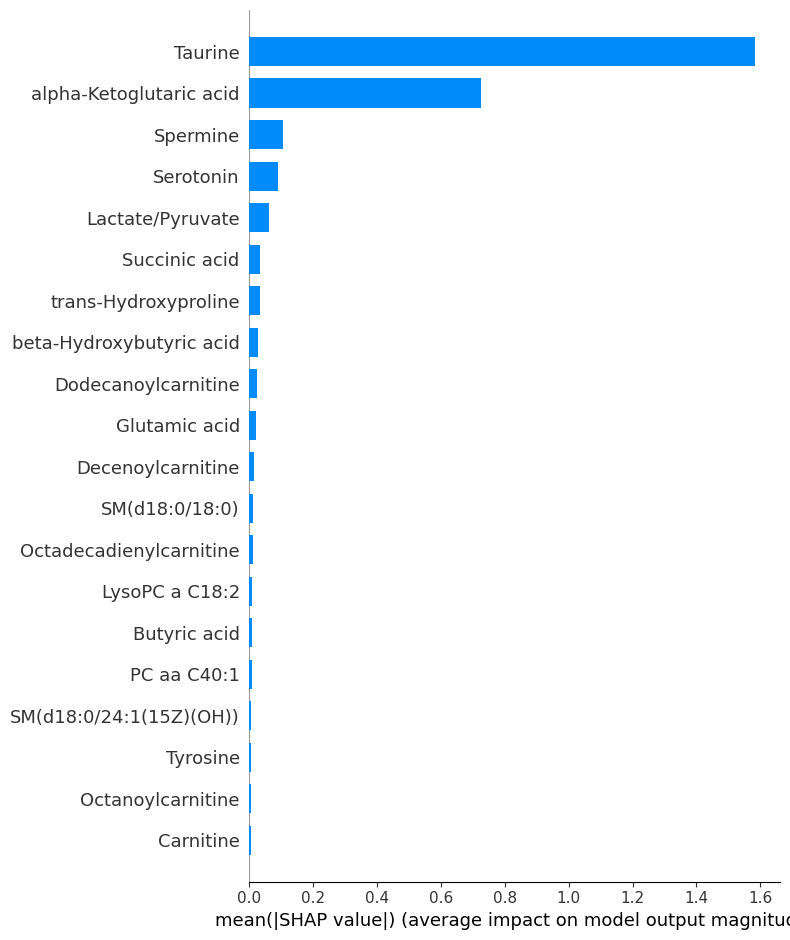

'\nTaurine\nalpha-Ketoglutaric acid\n'

In [ ]:
shap.summary_plot(shap_values[1], X,plot_type='bar')

"""
Taurine
alpha-Ketoglutaric acid
"""

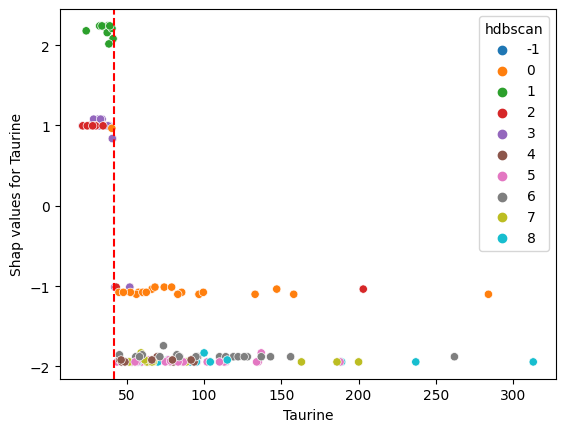

In [ ]:
"""
Taurine
alpha-Ketoglutaric acid
"""
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 42 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

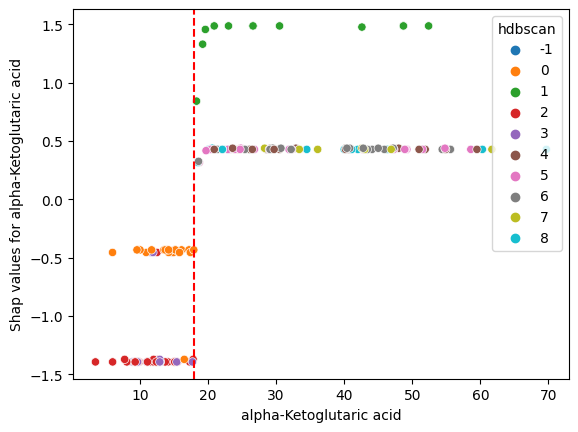

In [ ]:
"""
Taurine
alpha-Ketoglutaric acid
"""
string = 'alpha-Ketoglutaric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[1],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 18 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 2

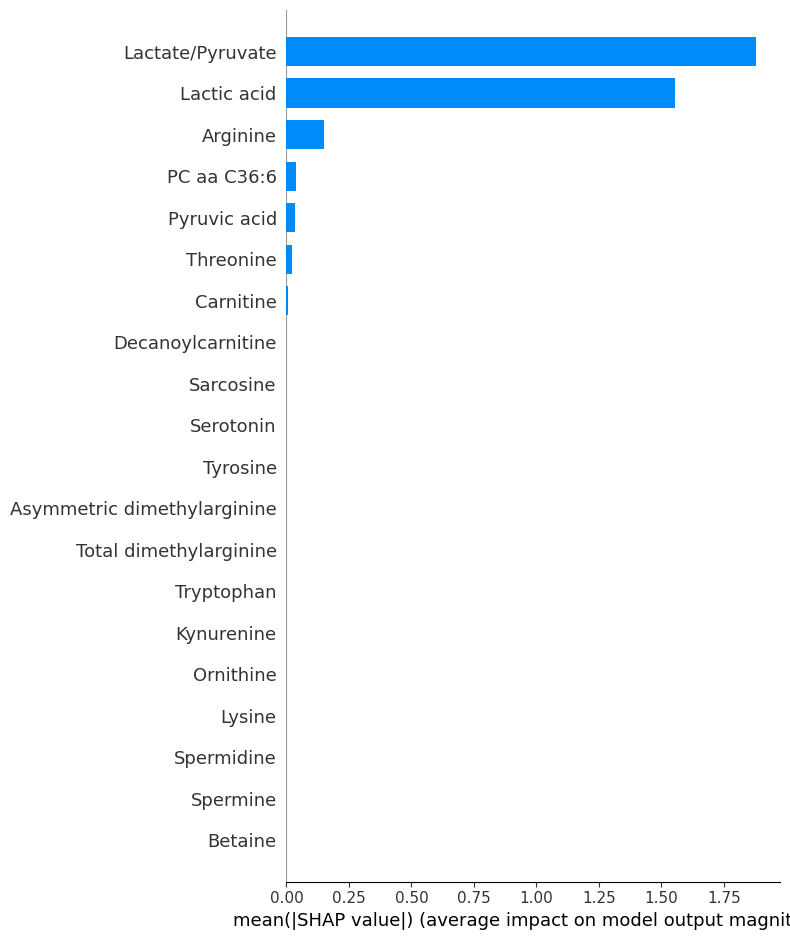

In [ ]:
shap.summary_plot(shap_values[2], X,plot_type='bar')


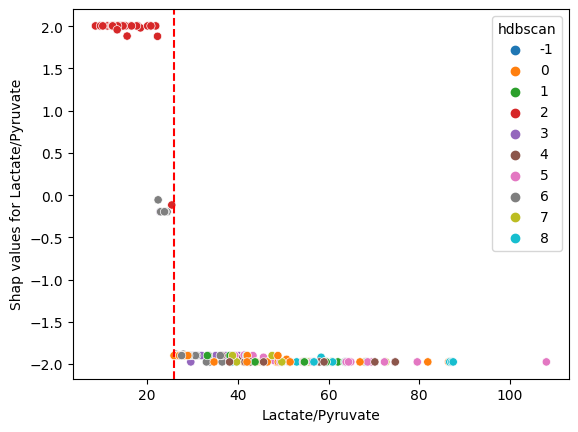

In [ ]:
"""
Lactate/Pyruvate
Lactic acid
Arginine
"""
string = 'Lactate/Pyruvate'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 26 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

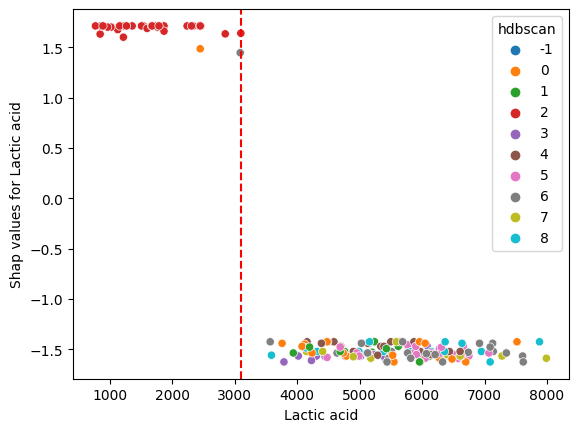

In [ ]:
"""
Lactate/Pyruvate
Lactic acid
Arginine
"""
string = 'Lactic acid'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 3100 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

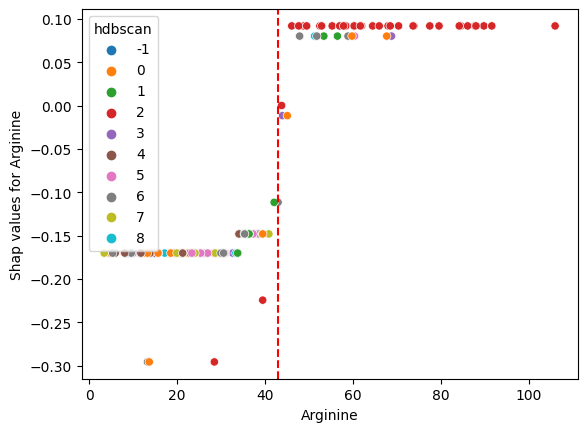

In [ ]:
"""
Lactate/Pyruvate
Lactic acid
Arginine
"""
string = 'Arginine'
xx= X[string]
yy = pd.DataFrame( shap_values[2],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 43 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 3

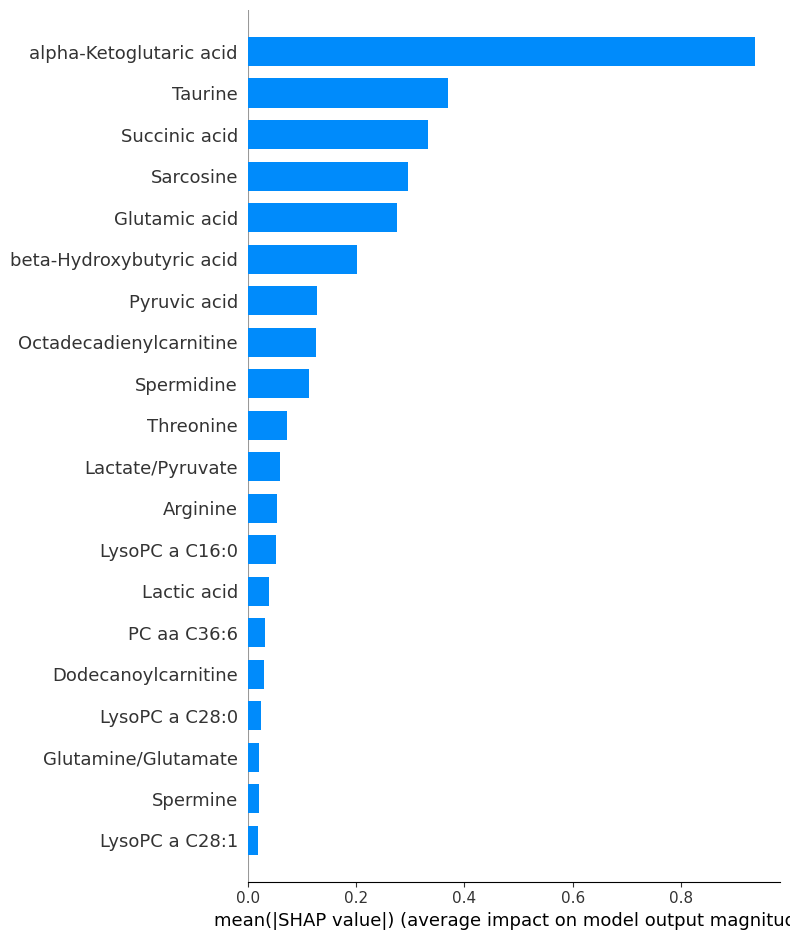

'\nalpha-Ketoglutaric acid\nTaurine\nSuccinic acid\nSarcosine\nGlutamic acid\nbeta-Hydroxybutyric acid\n'

In [ ]:
shap.summary_plot(shap_values[3], X,plot_type='bar')

"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
beta-Hydroxybutyric acid
"""

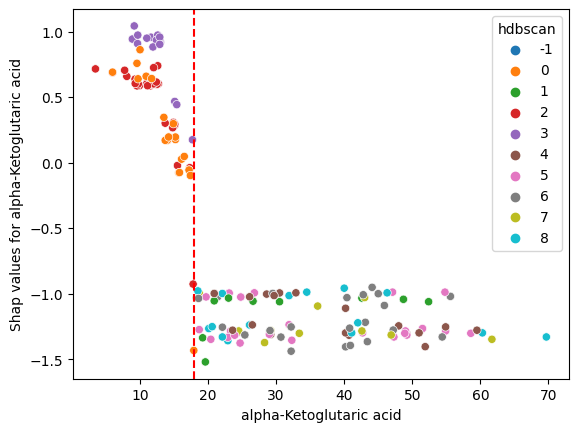

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
"""
string = 'alpha-Ketoglutaric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 18 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

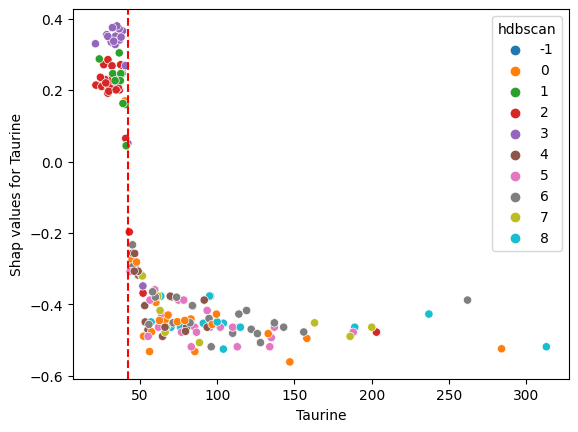

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
"""
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 42 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

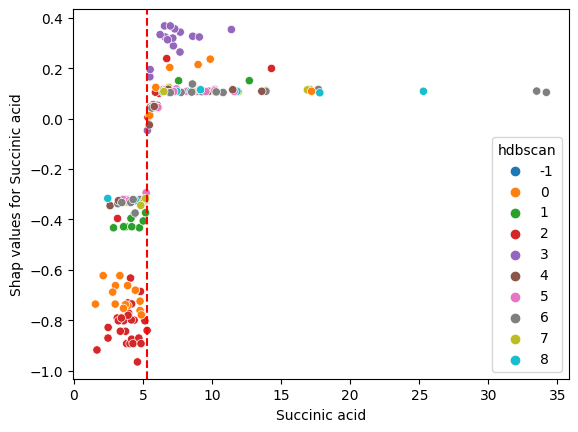

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
"""
string = 'Succinic acid'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 5.3 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

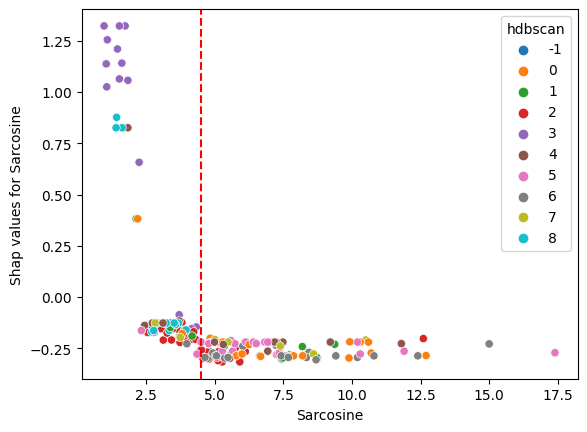

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
"""
string = 'Sarcosine'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 4.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

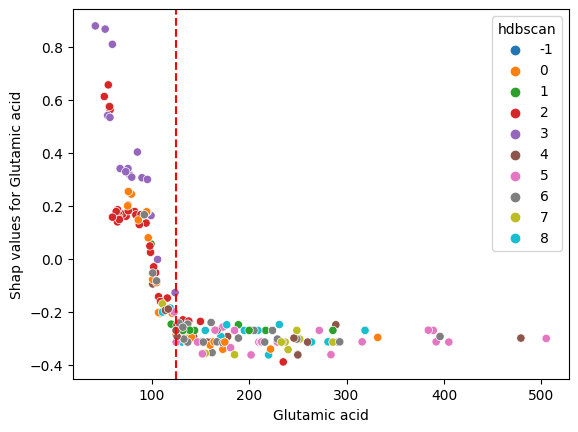

In [ ]:
"""
alpha-Ketoglutaric acid
Taurine
Succinic acid
Sarcosine
Glutamic acid
"""
string = 'Glutamic acid'
xx= X[string]
yy = pd.DataFrame( shap_values[3],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 125 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 4

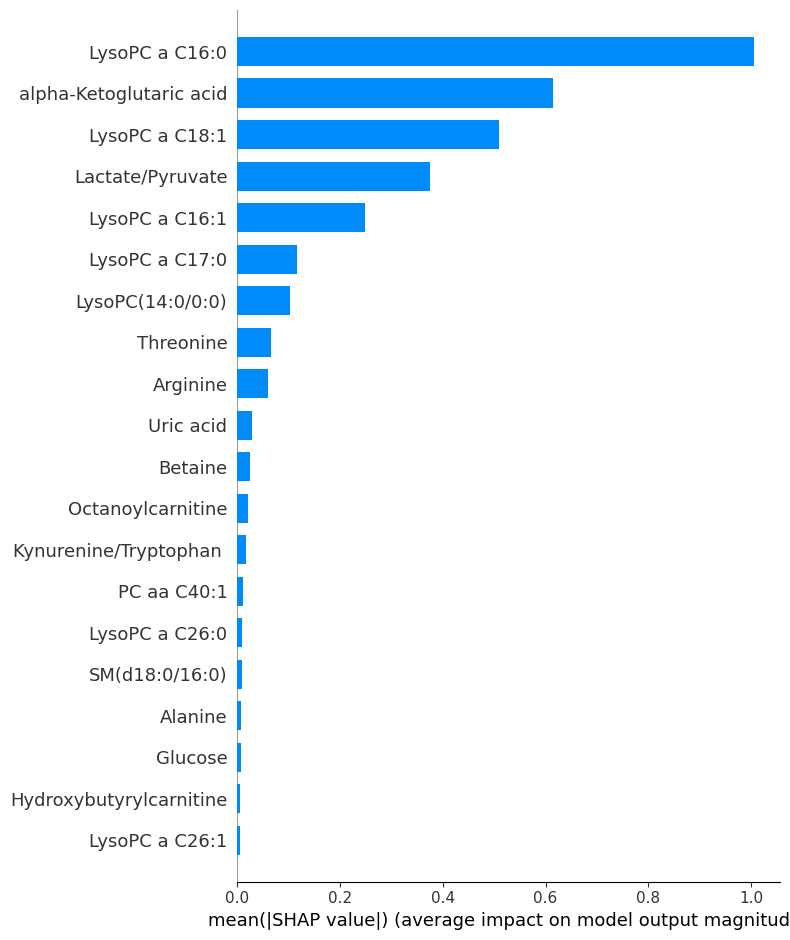

'\nLysoPC a C16:0\nalpha-Ketoglutaric acid\nLysoPC a C18:1\nLactate/Pyruvate\nLysoPC a C16:1\n'

In [ ]:
shap.summary_plot(shap_values[4], X,plot_type='bar')
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""

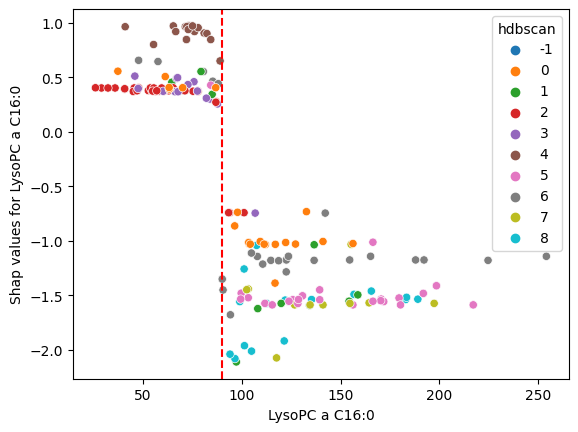

In [ ]:
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 90 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

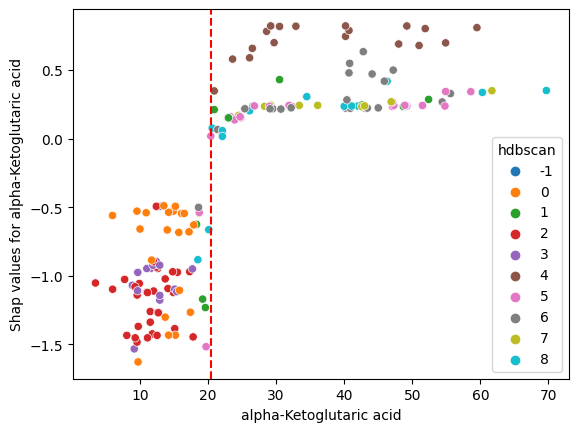

In [ ]:
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""
string = 'alpha-Ketoglutaric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 20.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

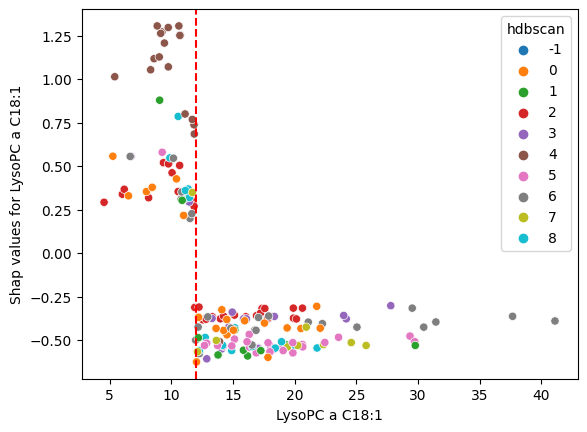

In [ ]:
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""
string = 'LysoPC a C18:1'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 12 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

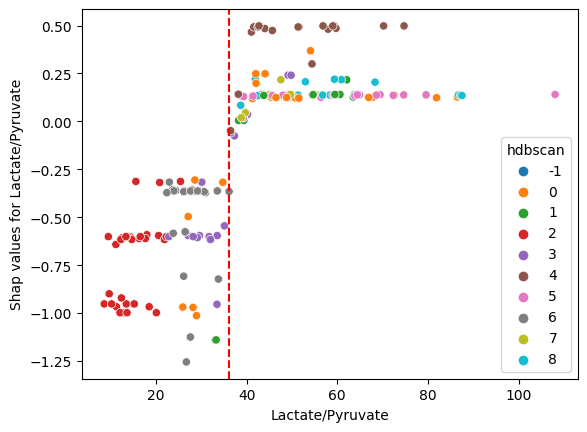

In [ ]:
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""
string = 'Lactate/Pyruvate'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 36 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

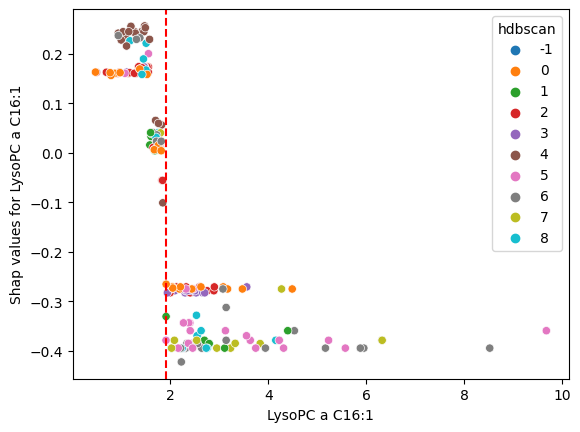

In [ ]:
"""
LysoPC a C16:0
alpha-Ketoglutaric acid
LysoPC a C18:1
Lactate/Pyruvate
LysoPC a C16:1
"""
string = 'LysoPC a C16:1'
xx= X[string]
yy = pd.DataFrame( shap_values[4],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 1.9 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 5

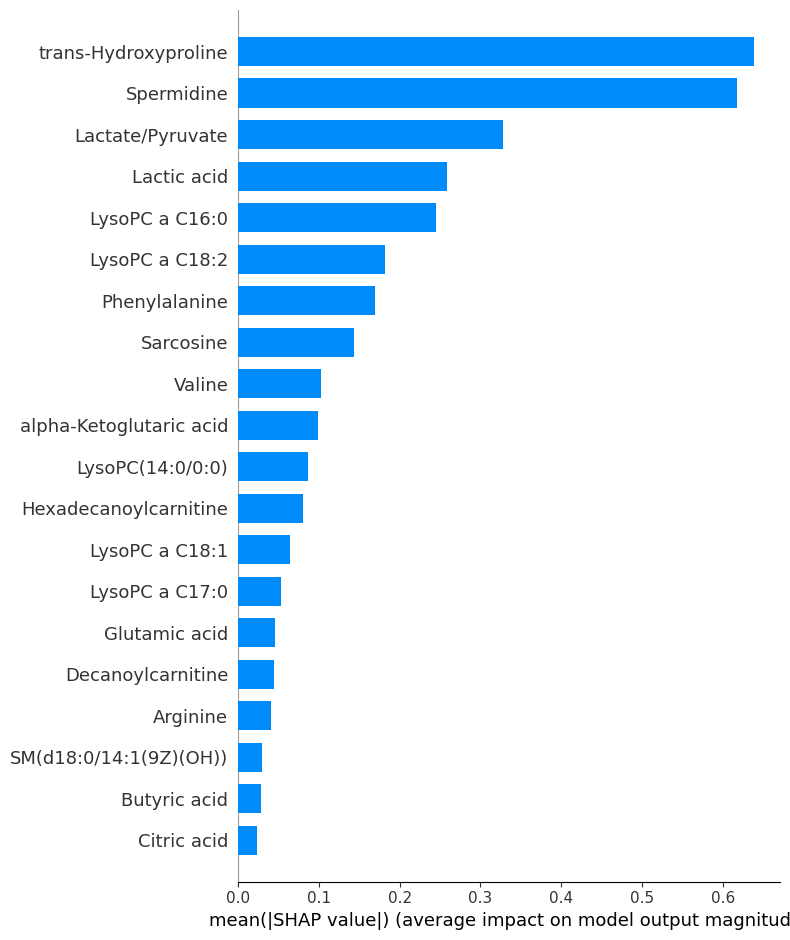

'\ntrans-Hydroxyproline\nSpermidine\nLactate/Pyruvate\nLactic acid\nLysoPC a C16:0\nLysoPC a C18:2\nPhenylalanine\nSarcosine\n'

In [ ]:
  shap.summary_plot(shap_values[5], X,plot_type='bar')
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""

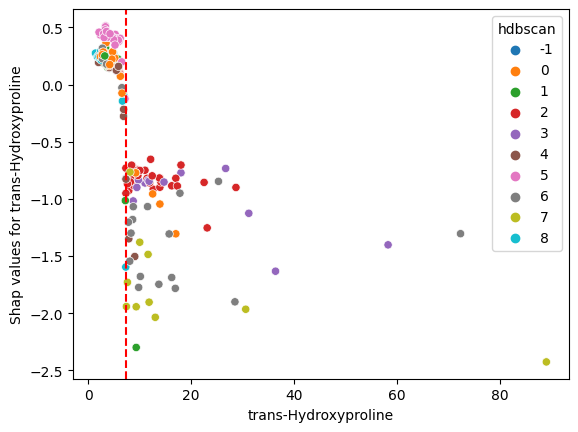

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'trans-Hydroxyproline'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 7.3 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

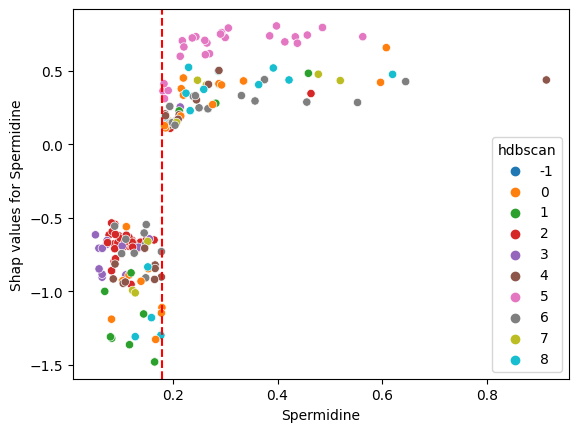

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'Spermidine'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 0.18 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

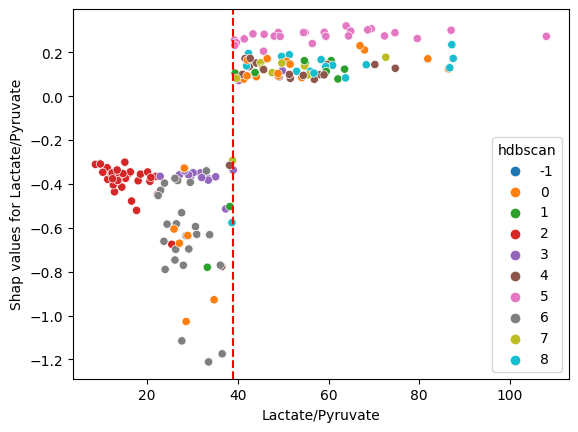

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'Lactate/Pyruvate'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 39 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

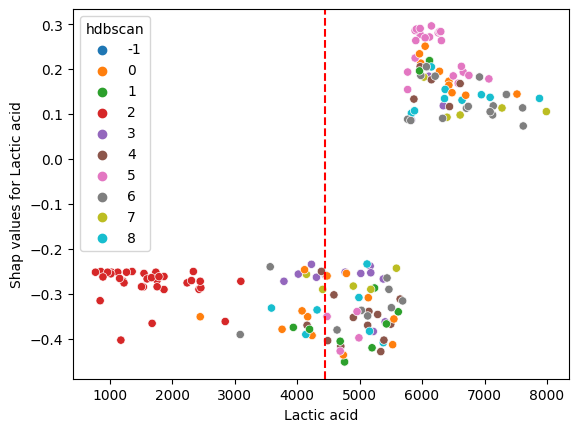

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'Lactic acid'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 4450 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

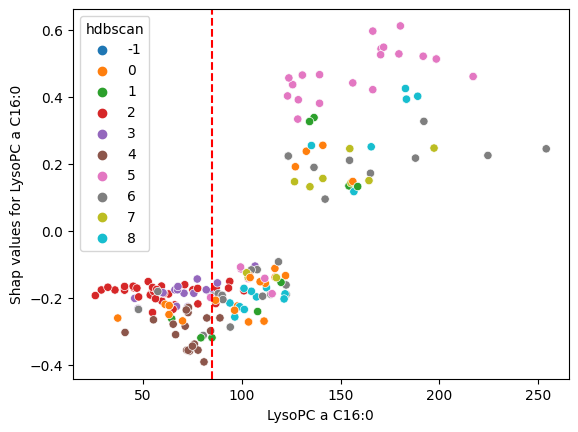

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 85 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

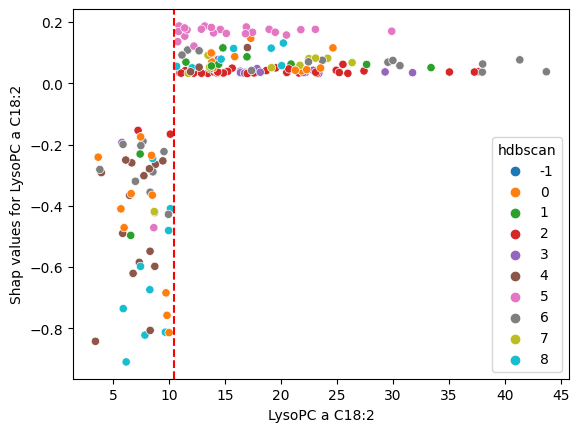

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'LysoPC a C18:2'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 10.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

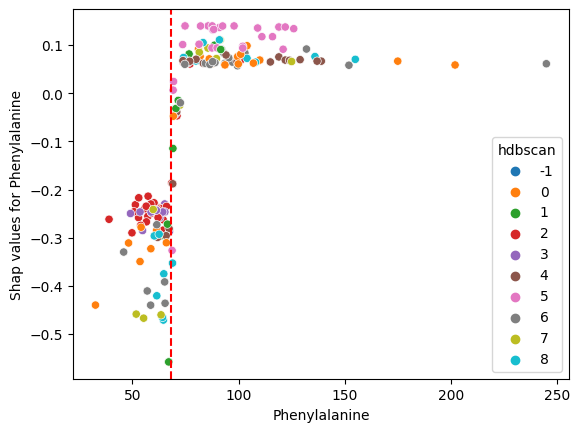

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'Phenylalanine'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 68 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

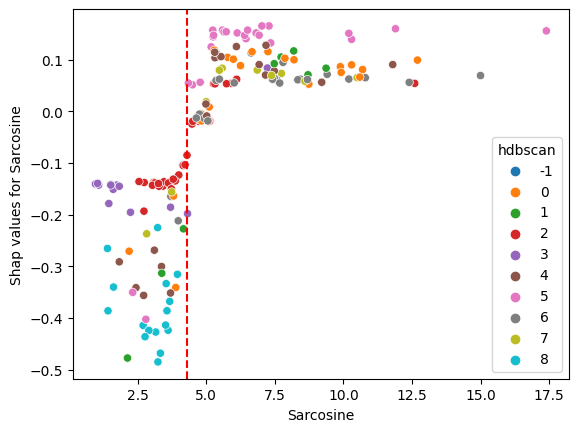

In [ ]:
"""
trans-Hydroxyproline
Spermidine
Lactate/Pyruvate
Lactic acid
LysoPC a C16:0
LysoPC a C18:2
Phenylalanine
Sarcosine
"""
string = 'Sarcosine'
xx= X[string]
yy = pd.DataFrame( shap_values[5],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 4.3 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 6

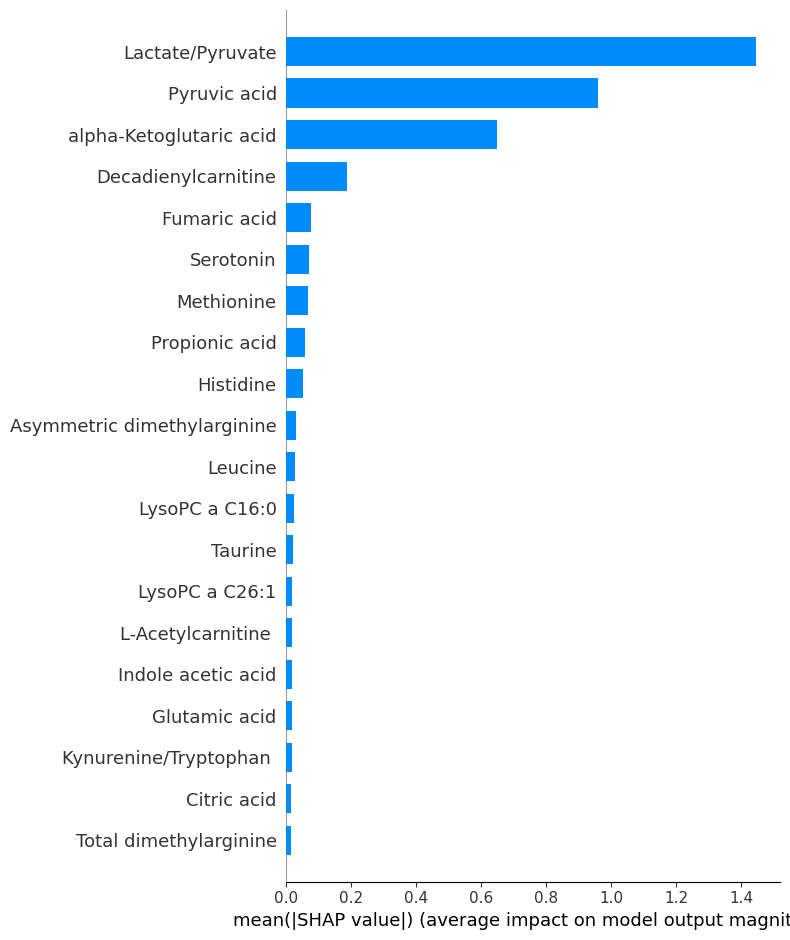

In [ ]:
shap.summary_plot(shap_values[6], X,plot_type='bar')

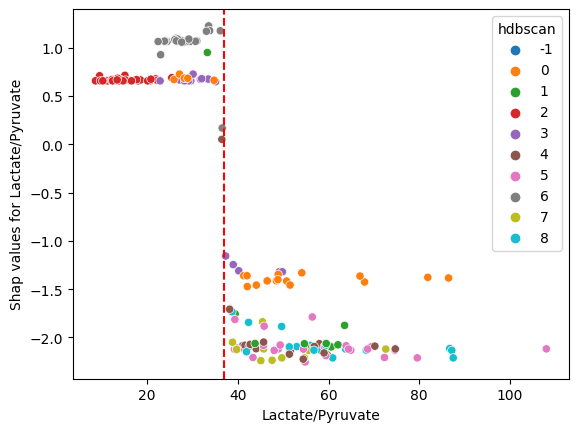

In [ ]:
"""
Lactate/Pyruvate
Pyruvic acid
alpha-Ketoglutaric acid
"""
string = 'Lactate/Pyruvate'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 37 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

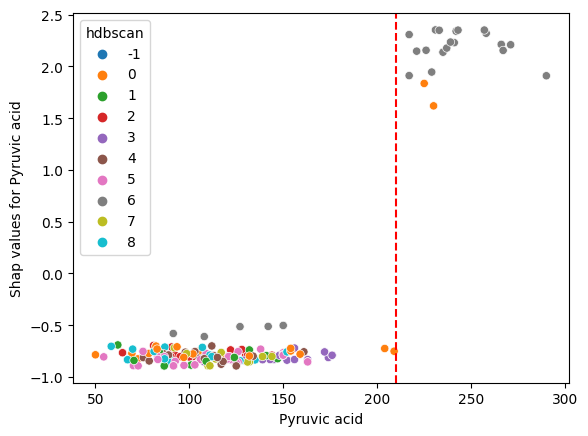

In [ ]:
"""
Lactate/Pyruvate
Pyruvic acid
alpha-Ketoglutaric acid
"""
string = 'Pyruvic acid'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 210 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

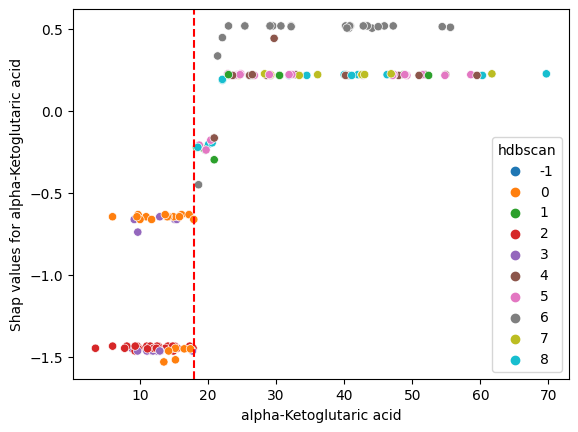

In [ ]:
"""
Lactate/Pyruvate
Pyruvic acid
alpha-Ketoglutaric acid
"""
string = 'alpha-Ketoglutaric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[6],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 18 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 7

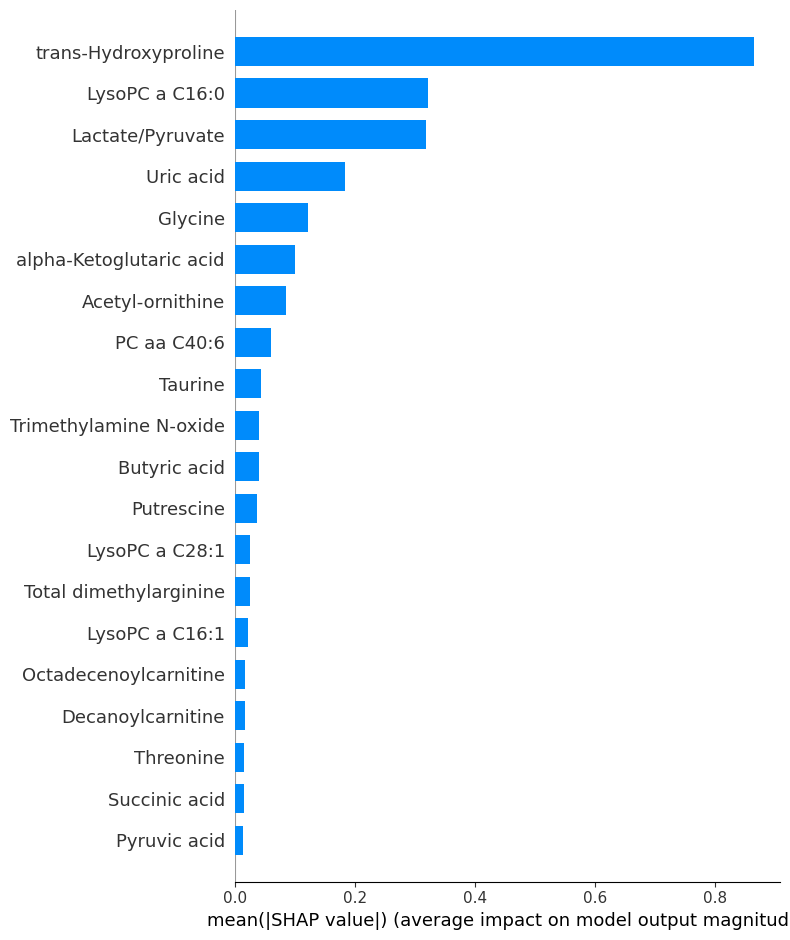

In [ ]:
shap.summary_plot(shap_values[7], X,plot_type='bar')

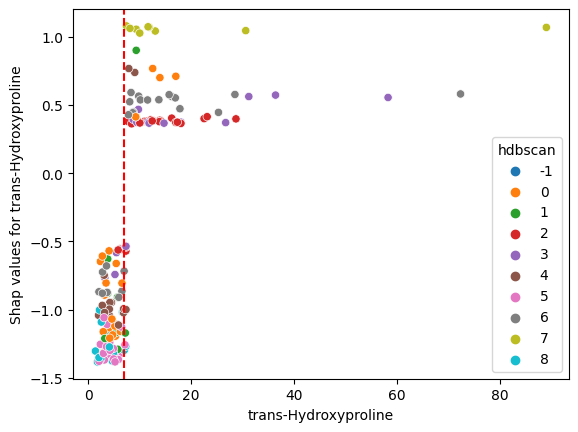

In [ ]:
"""
trans-Hydroxyproline
LysoPC a C16:0
Lactate/Pyruvate
Uric acid
"""
string = 'trans-Hydroxyproline'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 7 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

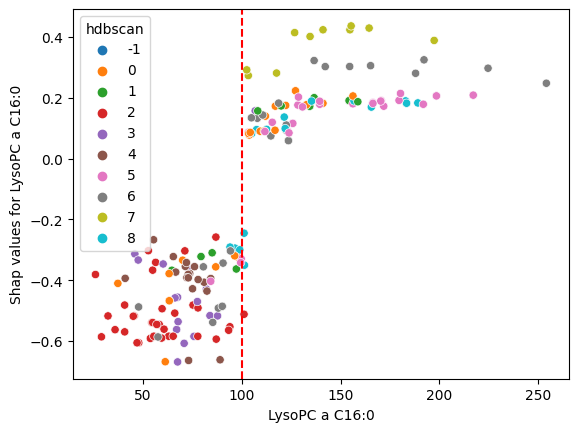

In [ ]:
"""
trans-Hydroxyproline
LysoPC a C16:0
Lactate/Pyruvate
Uric acid
"""
string = 'LysoPC a C16:0'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 100 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

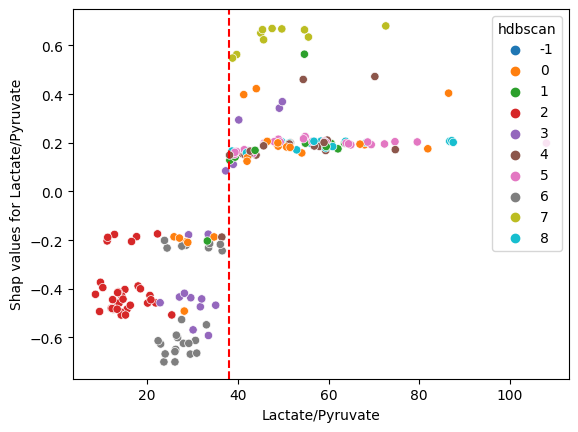

In [ ]:
"""
trans-Hydroxyproline
LysoPC a C16:0
Lactate/Pyruvate
Uric acid
"""
string = 'Lactate/Pyruvate'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 38 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

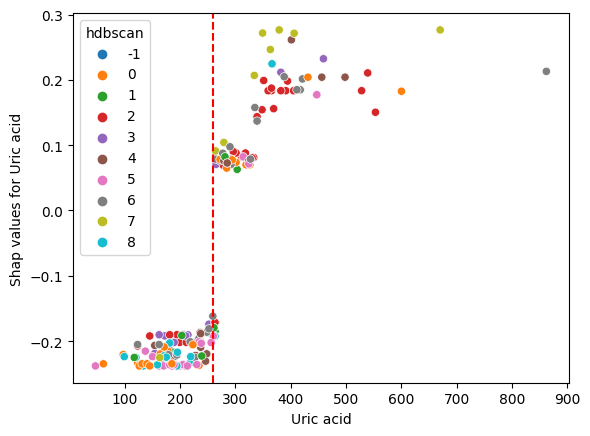

In [ ]:
"""
trans-Hydroxyproline
LysoPC a C16:0
Lactate/Pyruvate
Uric acid
"""
string = 'Uric acid'
xx= X[string]
yy = pd.DataFrame( shap_values[7],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 260 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

#Cluster 8

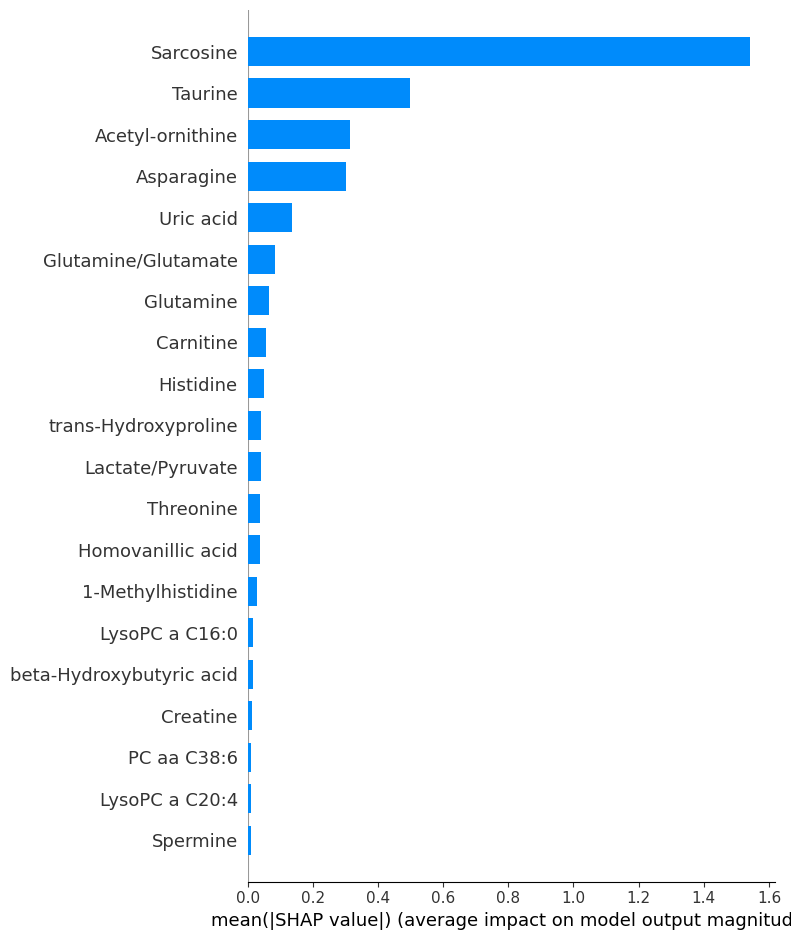

In [ ]:
shap.summary_plot(shap_values[8], X,plot_type='bar')

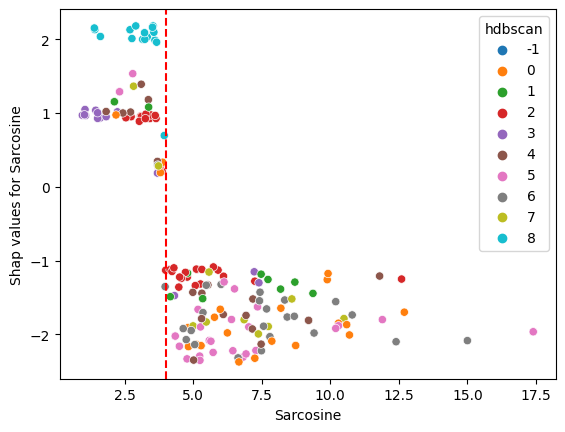

In [ ]:
"""
Sarcosine
Taurine
Acetyl-ornithine
Asparagine
"""
string = 'Sarcosine'
xx= X[string]
yy = pd.DataFrame( shap_values[8],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 4 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

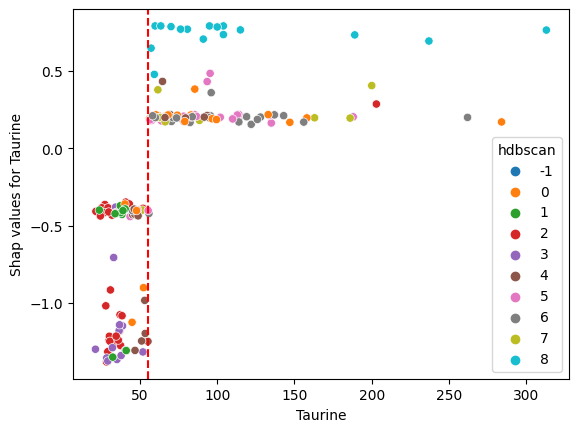

In [ ]:
"""
Sarcosine
Taurine
Acetyl-ornithine
Asparagine
"""
string = 'Taurine'
xx= X[string]
yy = pd.DataFrame( shap_values[8],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 55 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

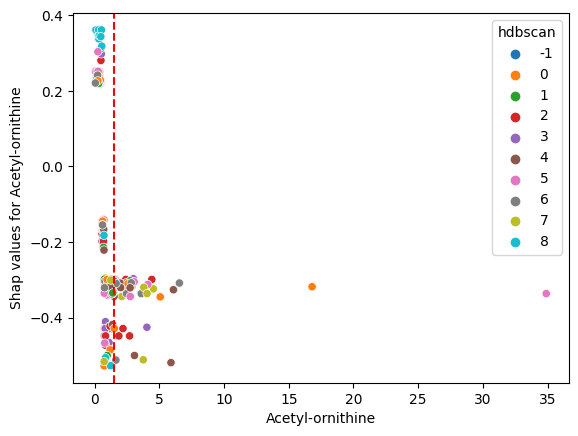

In [ ]:
"""
Sarcosine
Taurine
Acetyl-ornithine
Asparagine
"""
string = 'Acetyl-ornithine'
xx= X[string]
yy = pd.DataFrame( shap_values[8],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 1.5 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()

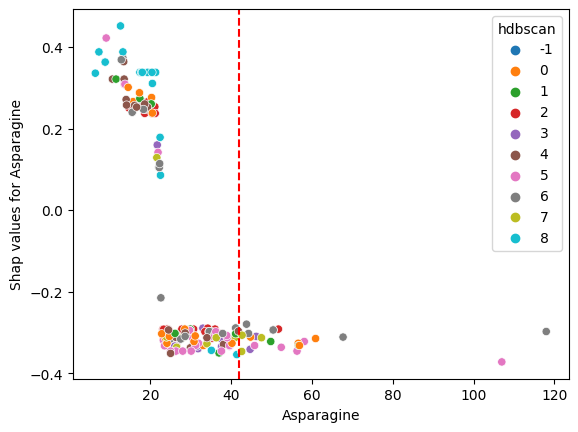

In [ ]:
"""
Sarcosine
Taurine
Acetyl-ornithine
Asparagine
"""
string = 'Asparagine'
xx= X[string]
yy = pd.DataFrame( shap_values[8],columns=X.columns,index= X.index)[string]
import seaborn as sns
# Create a scatter plot
#plt.figure(figsize=(40, 6))  # Set the figure size
sns.scatterplot(x=xx, y=yy,hue=CONTI_DF['hdbscan'],palette='tab10' )

# Add labels and title
plt.xlabel(string)
plt.ylabel('Shap values for ' + str(string))

# Draw a vertical line
x_value = 42 # Set the x-axis value for the vertical line
plt.axvline(x=x_value, color='red', linestyle='--')

# Show the plot
plt.show()